In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

c:\users\wiktor\appdata\local\programs\python\python36\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


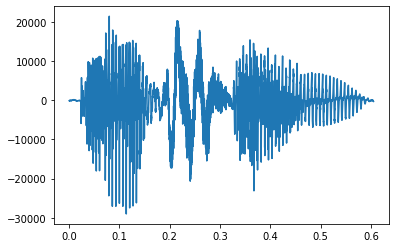

In [2]:
directory = './samples/sample_1.wav'
fs, data = wavfile.read(directory)
t = np.linspace(0, len(data) / fs, len(data))
plt.plot(t, data)
plt.show()

In [3]:
def normalize(data):
    return data / max(abs(data))

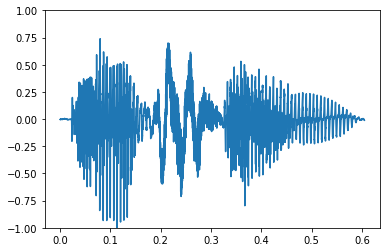

In [4]:
clean_data = normalize(data)
plt.plot(t, clean_data)
plt.ylim([-1, 1])
plt.show()

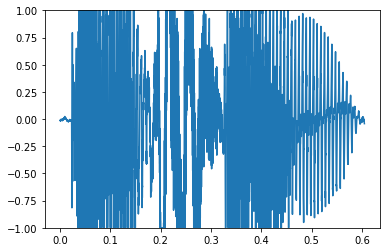

In [5]:
distortion_factor = 4
dist_data = np.clip((clean_data*distortion_factor).astype(np.float16), -1, 1)
plt.plot(t, dist_data)
plt.ylim([-1, 1])
plt.show()
dist_data_int = (dist_data*(2**15) // 1).astype(np.int16)
wavfile.write('./tmp_files/tmp_dist.wav', fs, dist_data_int)

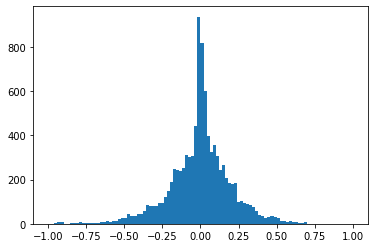

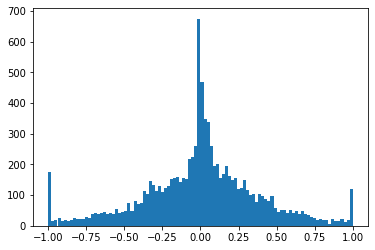

In [35]:
plt.hist(clean_data, bins=100, range=(-1, 1))
plt.show()
plt.hist(dist_data, bins=100, range=(-1, 1))
plt.show()